In [147]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [148]:
os.chdir("C:\\Users\\18174")

In [149]:
cars = pd.read_csv("1.04  real life.csv")

In [150]:
cars.head(3)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500


# Preprocessing

# Exploring the Descriptive Statistics of the Variables

In [151]:
cars.describe(include = 'all') #now we have descriptives for the categorical variables too 

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


# Determining the variables of interest

In [152]:
data  = cars.drop(['Model'], axis = 1)

In [153]:
data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [154]:
data_no_mv = data.dropna(axis = 0)

In [155]:
data_no_mv.describe()

,Price,Mileage,EngineV,Year
count,4025.000000,4025.000000,4025.000000,4025.000000
mean,19552.308065,163.572174,2.764586,2006.379627
std,25815.734988,103.394703,4.935941,6.695595
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,90.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21900.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


# Exploring the PDFs

<AxesSubplot:xlabel='Price', ylabel='Density'>

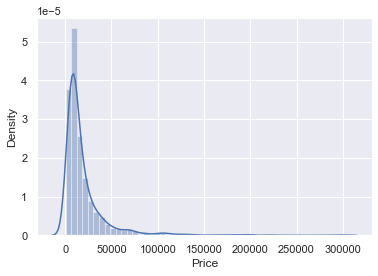

In [156]:
sns.distplot(data_no_mv['Price']) #for optimal results, looking for normal distribution 

# Dealing with Outliers

In [157]:
q = data_no_mv['Price'].quantile(.99)
data_1 = data_no_mv[data_no_mv['Price'] < q]
data_1.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


<AxesSubplot:xlabel='Price', ylabel='Density'>

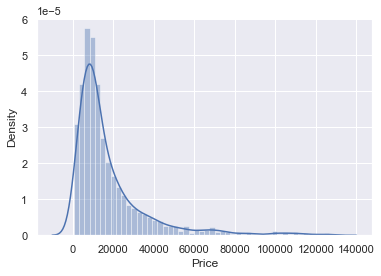

In [158]:
sns.distplot(data_1.Price)

# Dealing with Outliers

<AxesSubplot:xlabel='Mileage', ylabel='Density'>

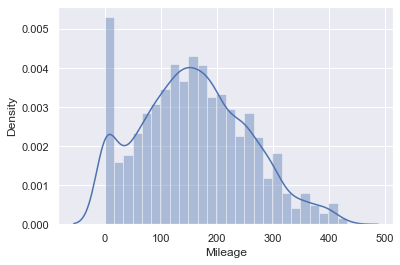

In [159]:
q = data_no_mv['Mileage'].quantile(.99)
data_2= data_no_mv[data_no_mv['Mileage'] < q]
data_no_mv.describe()
data_2.describe()
sns.distplot(data_2.Mileage)

<AxesSubplot:xlabel='Mileage', ylabel='Density'>

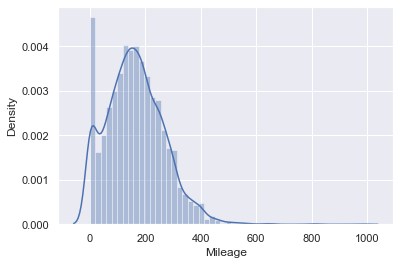

In [160]:
sns.distplot(data_no_mv['Mileage'])

<AxesSubplot:xlabel='EngineV', ylabel='Density'>

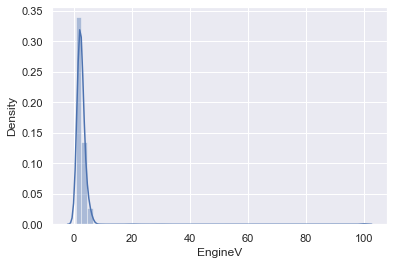

In [161]:
sns.distplot(data_no_mv['EngineV'])

In [162]:
q = data_no_mv['EngineV'].quantile(.99)
new_data = data_no_mv[data_no_mv['EngineV'] < q]
new_data['EngineV'].describe()

count    3984.000000
mean        2.449480
std         0.941286
min         0.600000
25%         1.800000
50%         2.200000
75%         3.000000
max         6.000000
Name: EngineV, dtype: float64

In [163]:
data_no_mv['EngineV'].describe()

count    4025.000000
mean        2.764586
std         4.935941
min         0.600000
25%         1.800000
50%         2.200000
75%         3.000000
max        99.990000
Name: EngineV, dtype: float64

# Checking the OLS Assumptions

In [164]:
data_3 = data_2[data_2['EngineV'] < 6.5]

<AxesSubplot:xlabel='EngineV', ylabel='Density'>

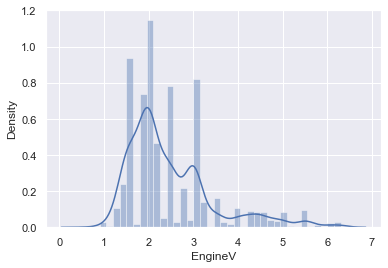

In [165]:
sns.distplot(data_3['EngineV'])

In [166]:
q = data_3['Year'].quantile(.01)
data_4 = data_3[data_3['Year'] > q]

In [167]:
data_cleaned = data_4.reset_index(drop = True)

In [168]:
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
3902,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
3903,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
3904,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
3905,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


In [169]:
data_cleaned.describe(include ='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3907,3907.000000,3907,3907.000000,3907.000000,3907,3907,3907.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1472,NaN,NaN,1815,3545,NaN
mean,NaN,19960.692119,NaN,158.929358,2.474771,NaN,NaN,2006.798055
std,NaN,26048.838086,NaN,96.242696,0.978819,NaN,NaN,6.127291
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7274.500000,NaN,89.500000,1.800000,NaN,NaN,2003.000000
50%,NaN,11800.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,22000.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


# Checking the OLS Assumptions

<AxesSubplot:xlabel='Price', ylabel='Density'>

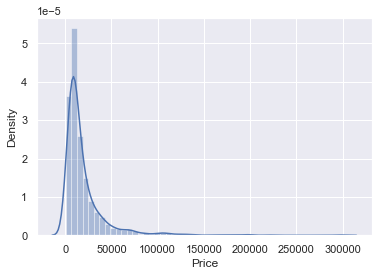

In [170]:
sns.distplot(data_cleaned['Price'])

In [171]:
log_price = np.log(data_cleaned['Price'])

In [172]:
data_cleaned['log_price'] = log_price

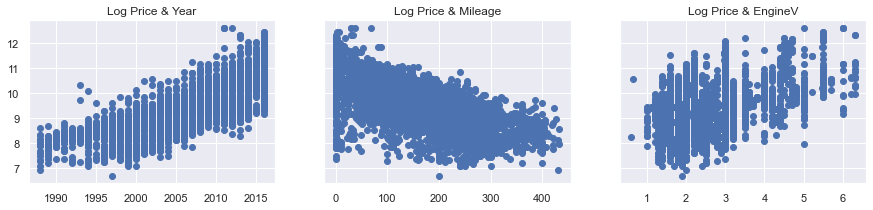

In [173]:
f,(ax1,ax2,ax3) = plt.subplots(1, 3, sharey = True, figsize = (15,3))

ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title("Log Price & Year")
ax2.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax2.set_title("Log Price & Mileage")
ax3.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax3.set_title("Log Price & EngineV")
plt.show() # can see herteroscicity fixed with log transformation, no autocorrelation 

In [174]:
data = data_cleaned.copy()

In [175]:
data = data.drop(labels = 'Price', axis = 1)

In [176]:
data

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3902,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3903,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3904,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3905,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


# Multicollinearity

In [219]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data [['log_price','Mileage','EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range (variables.shape[1])]
vif['Features'] = variables.columns
vif

,VIF,Features
0,10.249916,log_price
1,3.079545,Mileage
2,8.898839,EngineV


In [ ]:
# When VIF 0 no multicollinearity at all (between 1-5 typically good )

In [220]:
data_no_multicollinearity = data.drop('Year', axis = 1)

# Create Dummy Variables

In [221]:
data_with_dummies = pd.get_dummies(data = data_no_multicollinearity, drop_first = True)

In [226]:
data_with_dummies.columns.values

array(['Brand', 'Mileage', 'EngineV', 'log_price', 'Body_hatch',
       'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes'], dtype=object)

In [239]:
cols = ['log_price','Brand', 'Mileage', 'EngineV', 'Body_hatch',
       'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes']
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head(5)

,log_price,Brand,Mileage,EngineV,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,0,277,2.0,0,0,1,0,0,0,0,1,1
1,8.974618,0,427,2.9,0,0,0,0,1,0,0,0,1
2,9.495519,0,358,5.0,0,0,1,0,0,1,0,0,1
3,10.043249,1,240,4.2,0,0,0,0,0,0,0,1,1
4,9.814656,0,120,2.0,0,0,0,0,0,0,0,1,1


# Linear Regression Model

In [240]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [243]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis =1)

In [244]:
from sklearn.preprocessing import StandardScaler

In [245]:
scaler = StandardScaler() 
scaler.fit(inputs) #fit inputs 

StandardScaler()

In [246]:
inputs_scaled = scaler.transform(inputs) #use tranform method to get standardized inputs 

In [248]:
from sklearn.model_selection import train_test_split

In [249]:
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size = 0.2, random_state = 365) 

In [250]:
reg = LinearRegression()

In [251]:
reg.fit(x_train, y_train)

LinearRegression()

In [252]:
y_hat = reg.predict(x_train)

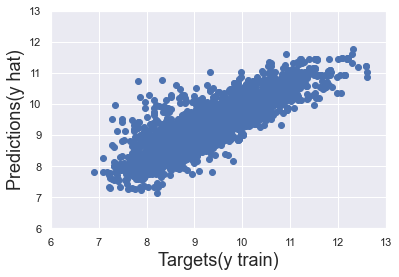

In [259]:
plt.scatter(y_train, y_hat)
plt.xlabel("Targets(y train)", size = 18)
plt.ylabel("Predictions(y hat)", size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [262]:
reg_summary = pd.DataFrame(inputs.columns.values, columns = ['Features'])
reg_summary['weights'] = reg.coef_
reg_summary

,Features,weights
0,Brand,0.033190
1,Mileage,-0.457351
2,EngineV,0.341436
3,Body_hatch,-0.129243
4,Body_other,-0.075972
5,Body_sedan,-0.146059
6,Body_vagon,-0.119663
7,Body_van,-0.165374
8,Engine Type_Gas,-0.151777
9,Engine Type_Other,-0.037502
